In [1]:
#Kaggle problem 1 - Titanic 
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#EDA

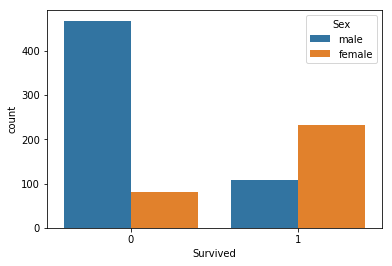

In [7]:
sns.countplot(x='Survived', data=df, hue='Sex')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


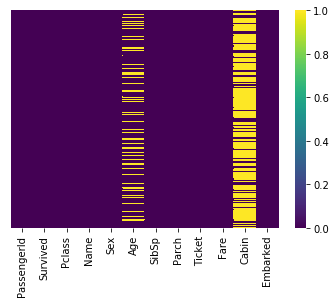

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cmap ='viridis')

In [10]:
df.drop('Cabin', axis=1, inplace = True)

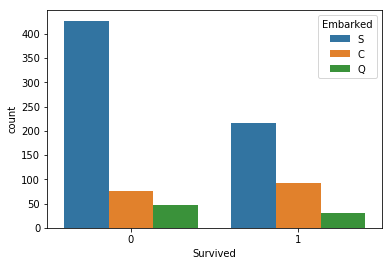

In [11]:
sns.countplot('Survived', hue='Embarked', data=df)

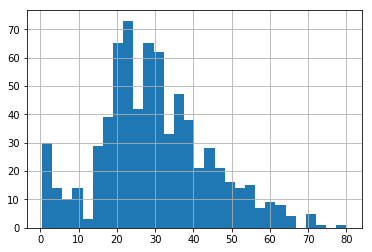

In [12]:
df['Age'].hist(bins=30)

In [12]:
#impute age

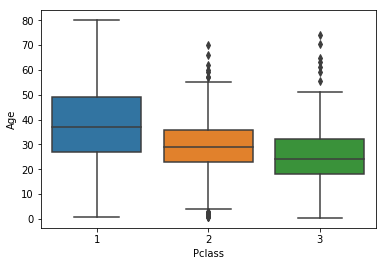

In [13]:
sns.boxplot(x='Pclass', y='Age', data= df)

In [14]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
def imputeage (cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1: 
            return 38
        if Pclass ==2:
            return 30
        if Pclass ==3:
            return 25
    else:
        return Age    
    

In [16]:
df['Age']= df[['Age','Pclass']].apply(imputeage,axis=1)

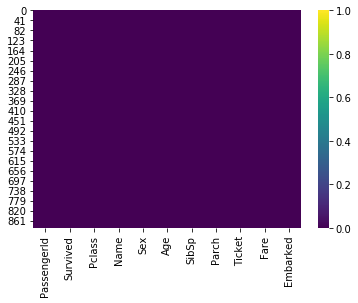

In [17]:
sns.heatmap(df.isnull(),cmap='viridis')


In [18]:
#Embarked feature

In [19]:
df['Embarked'] = df['Embarked'].fillna(value='S')

In [20]:
df.info() #Missing embarked values added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
#Converting categorical features

In [21]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [22]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [23]:
df.drop(['Embarked', 'Sex'], axis=1, inplace = True)

In [24]:
df['Name'][888].split(',')[1].split('.')

[' Miss', ' Catherine Helen "Carrie"']

In [25]:
def grabtitle(x):
    i=0
    title = []
    while (i<=890):
        title.append(x[i].split(',')[1].split('.')[0])
        i=i+1
    return title
    
    

In [26]:
df['Title']= grabtitle(df['Name'])

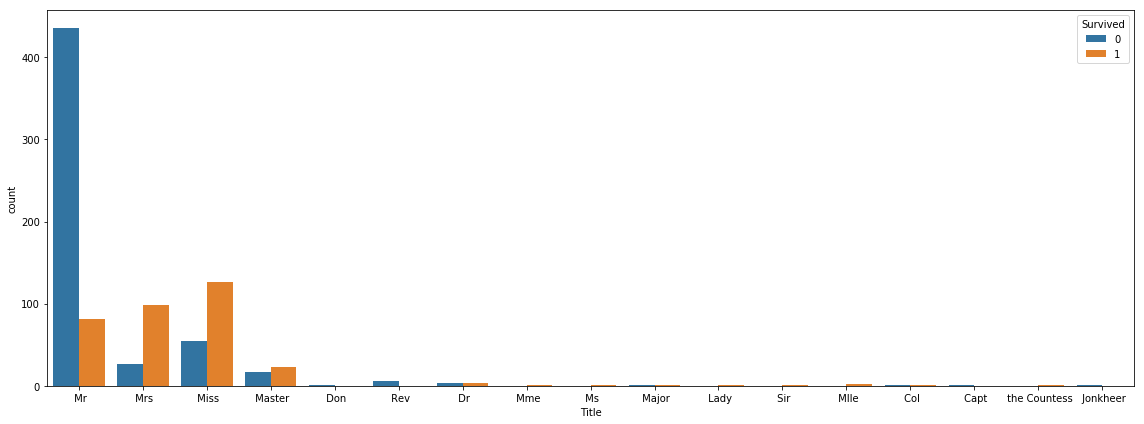

In [27]:
plt.figure(figsize=(16,6))
sns.countplot(df['Title'], hue=df['Survived'])
plt.tight_layout()


In [28]:
def replace_titles(x):
    i=0
    new_title =[]
    while (i<=890):
        if x[i] in [' Capt',  ' Col', ' Don', ' Jonkheer', ' Major', ' Rev', ' Sir', ' Mme', ' Ms Title', ' Lady', ' Mlle', ' the Countess', ' Dr', ' Ms']:
            new_title.append('Others')
            i=i+1
        else:
            new_title.append(x[i])
            i=i+1
    return new_title

In [29]:
df['newtitle'] = replace_titles(df['Title'])

In [30]:
df['newtitle'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Others      27
Name: newtitle, dtype: int64

In [33]:
#df.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], axis =1, inplace = True)

In [31]:
titles = pd.get_dummies(df['newtitle'], drop_first=True)
df= pd.concat([df, embark, titles], axis =1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,newtitle,Q,S,Miss,Mr,Mrs,Others
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,Mr,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,Mrs,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,Miss,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,Mrs,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,Mr,0,1,0,1,0,0


In [35]:
X= df.drop(['Name', 'Ticket', 'Title', 'newtitle','PassengerId', 'Survived'],axis=1)
X = pd.concat([X, sex], axis=1)


In [39]:
y= df['Survived']

In [36]:
X.drop('male', axis=1,inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =101)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
mod1 = LogisticRegression()

In [72]:
mod1.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
y_pred = mod1.predict(X_test)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,Miss,Mr,Mrs,Others
331,1,45.5,0,0,28.500,0,1,0,1,0,0
700,1,18.0,1,0,227.525,0,0,0,0,1,0
748,1,19.0,1,0,53.100,0,1,0,1,0,0
751,3,6.0,0,1,12.475,0,1,0,0,0,0
481,2,30.0,0,0,0.000,0,1,0,1,0,0


In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
print(confusion_matrix(y_test, y_pred))

[[89 10]
 [23 57]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.85      0.71      0.78        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
#Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
mod2 = RandomForestClassifier()

In [79]:
mod2.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
y_pred = mod2.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.83      0.72      0.77        80

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [52]:
#SVC

In [82]:
from sklearn.svm import SVC

In [58]:
#

In [83]:
param_grid = {'C':[1,10,100,1000,10000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose =3 )

In [86]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6554621848739496, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6413502109704642, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6666666666666666, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6890756302521008, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6751054852320675, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.7088607594936709, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=

[CV] ....... C=10000, gamma=1, score=0.6244725738396625, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] ....... C=10000, gamma=1, score=0.6497890295358649, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ..... C=10000, gamma=0.1, score=0.6554621848739496, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ..... C=10000, gamma=0.1, score=0.6286919831223629, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ..... C=10000, gamma=0.1, score=0.6835443037974683, total=   0.1s
[CV] C=10000, gamma=0.01 .............................................
[CV] .... C=10000, gamma=0.01, score=0.7100840336134454, total=   0.2s
[CV] C=10000, gamma=0.01 .............................................
[CV] .... C=10000, gamma=0.01, score=0.6962025316455697, total=   0.2s
[CV] C=10000, gamma=0.01 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [87]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [88]:
y_pred = grid.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.86      0.69      0.76        80

   micro avg       0.81      0.81      0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



In [90]:
#Test set

In [92]:
test = pd.read_csv('test.csv')

In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
test.drop(['PassengerId','Ticket','Cabin'],axis=1, inplace = True)

In [95]:
embark = pd.get_dummies(test['Embarked'], drop_first = True)
sex = pd.get_dummies(test['Sex'], drop_first = True)

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [97]:
test['Age']= test[['Age','Pclass']].apply(imputeage,axis=1)

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [99]:
#

In [100]:
#

In [101]:
test['Fare'].fillna(value=test['Fare'].mean(), inplace = True)

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [103]:
test = pd.concat([test, sex], axis=1)

In [104]:
test = pd.concat([test, embark], axis=1)

In [105]:
test.drop('Embarked', axis=1, inplace = True)

In [106]:
test.head()
test.drop('Sex', axis=1, inplace = True)

In [107]:
#

In [113]:
def grabtitle(x):
    i=0
    title=[]
    while (i<=417):
        title.append(x[i].split(',')[1].split('.')[0])
        i=i+1
return title

NameError: name 'title' is not defined

In [112]:
test['Title']= grabtitle(test['Name'])

In [ ]:
#

In [114]:
def replace_titles(x):
    i=0
    new_title =[]
    while (i<=417):
        if x[i] in [' Capt',  ' Col', ' Don', ' Jonkheer', ' Major', ' Rev', ' Sir', ' Mme', ' Ms Title', ' Lady', ' Mlle', ' the Countess', ' Dr', ' Ms', ' Dona']:
            new_title.append('Others')
            i=i+1
        else:
            new_title.append(x[i])
            i=i+1
    return new_title

In [115]:
test['newtitle'] = replace_titles(test['Title'])

In [116]:
test['newtitle'].value_counts()


Series([], Name: newtitle, dtype: int64)

In [139]:
titles = pd.get_dummies(test['newtitle'], drop_first=True)
test= pd.concat([test, titles], axis =1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
Pclass      418 non-null int64
Name        418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
male        418 non-null uint8
Q           418 non-null uint8
S           418 non-null uint8
Title       418 non-null object
newtitle    418 non-null object
 Miss       418 non-null uint8
 Mr         418 non-null uint8
 Mrs        418 non-null uint8
Others      418 non-null uint8
dtypes: float64(2), int64(3), object(3), uint8(7)
memory usage: 29.1+ KB


In [117]:
X.test =test.drop(['Name','newtitle', 'Title'],axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [118]:
X.test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [120]:
X.test = pd.concat([X.test, embark,sex], axis=1)

In [121]:
y_pred = mod1.predict(X.test)

In [ ]:
#going ahead with SVM as it has lowest CV set error

In [124]:
from sklearn.svm import SVC

In [125]:
param_grid = {'C':[1,10,100,1000,10000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6632996632996633, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6767676767676768, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6262626262626263, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6734006734006734, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6936026936026936, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.7205387205387206, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=

[CV] ... C=1000, gamma=0.0001, score=0.8114478114478114, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] ....... C=10000, gamma=1, score=0.6599326599326599, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] ....... C=10000, gamma=1, score=0.6498316498316499, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] ....... C=10000, gamma=1, score=0.6195286195286195, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ..... C=10000, gamma=0.1, score=0.6666666666666666, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ...... C=10000, gamma=0.1, score=0.696969696969697, total=   0.1s
[CV] C=10000, gamma=0.1 ..............................................
[CV] ..... C=10000, gamma=0.1, score=0.6632996632996633, total=   0.6s
[CV] C=10000, gamma=0.01 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [128]:
y_pred1= grid.predict(X.test)

In [129]:
final4th = pd.DataFrame(y_pred1)

In [130]:
final4th.to_csv('Final-4th-SVM.csv')

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rfc = RandomForestClassifier()

In [133]:
rfc.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
X.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
male      418 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 18.9 KB


In [135]:
test['Fare'].fillna(value=test['Fare'].mean(), inplace = True)

In [136]:
X.test['Fare'].fillna(value=X.test['Fare'].mean(), inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [137]:
X.test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
male      418 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 18.9 KB


In [138]:
y_pred = rfc.predict(X.test)

In [139]:
final = pd.DataFrame(y_pred)

In [140]:
final.to_csv('Final-4th_RFC.csv')